In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm

from IPython.display import clear_output

from tsnake.initialize import compute_masked_regions

# Load image + create dummy mask

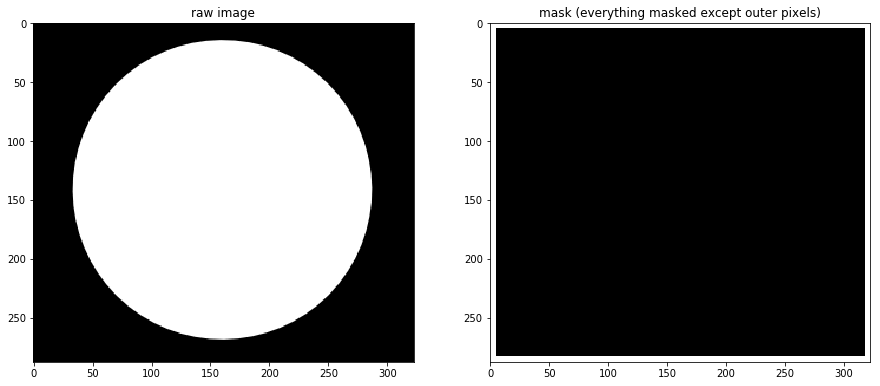

In [2]:
img_path = '../examples/test/circle.png'

image = cv2.imread(img_path, 0)
mask = np.zeros_like(image)
mask[5:-5, 5:-5] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 20))
ax1.set_title('raw image')
ax2.set_title('mask (everything masked except outer pixels)')
ax1.imshow(image, cmap=plt.cm.binary)
ax2.imshow(mask, cmap=plt.cm.binary)
plt.show()

# Initialize T-snake

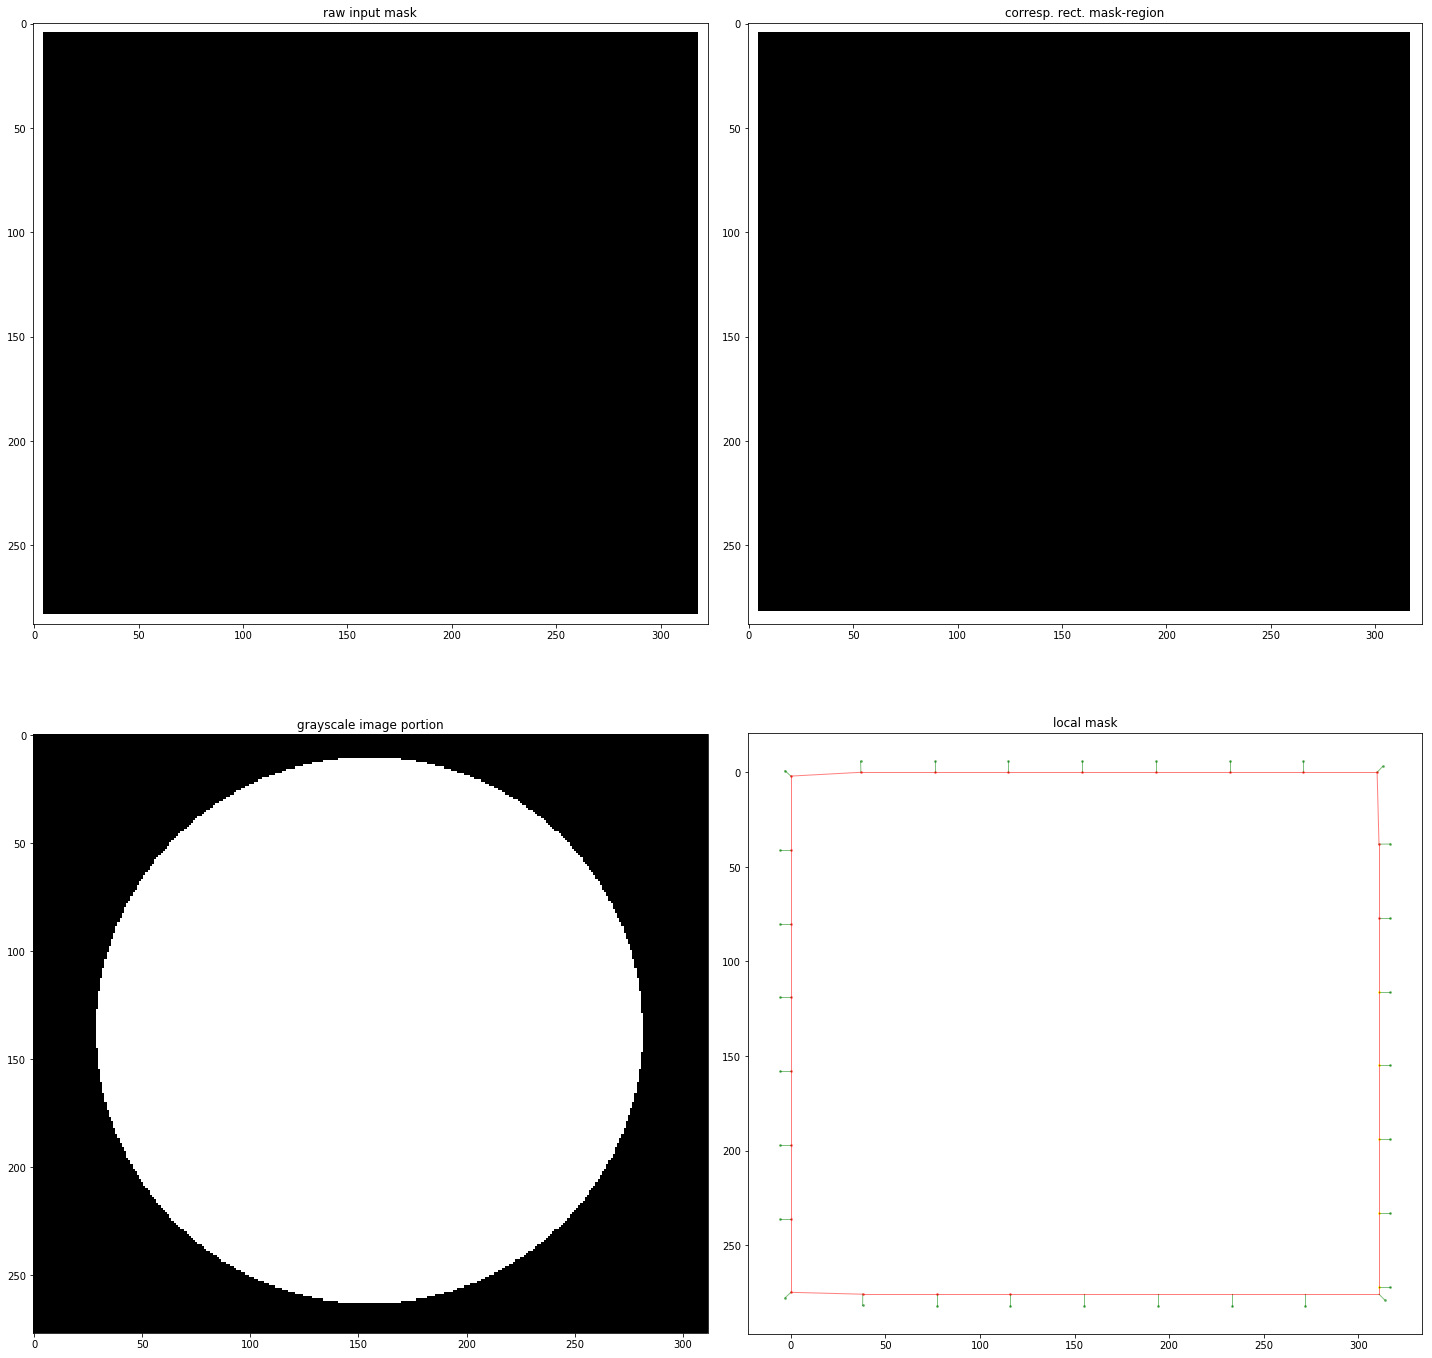

In [3]:
N = 30       # 30 nodes 
p = 1.0      # scale for Eq (7)
c = 2.0      # scale for Eq (A.4)
a = 2.0      # tension param in Eq (8)
b = 2.0      # bending param in Eq (8)
gamma = 1.0  # friction param in Eq (8)
dt = 0.01    # step size in Eq (8) 
sigma = 5.0  # gaussian filter param in Eq (A.4)
threshold = 10

region = compute_masked_regions(image, mask)[0]
region.initialize_tsnake(N, p, c, sigma, a, b, gamma, dt, threshold)
region.visualize()

snake = region._initial_tsnake

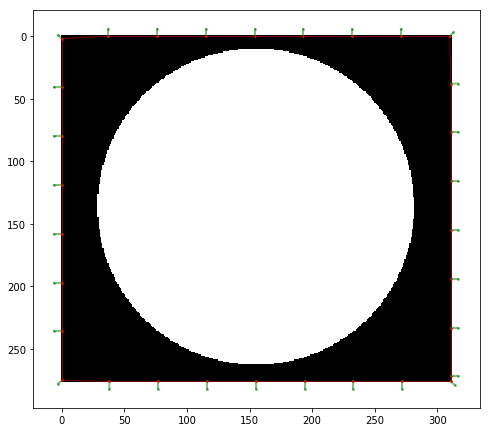

In [ ]:
region.show_snake()

# Evolve T-snake

In [ ]:
# Before:
plt.clf()
region.show_snake(save_fig='images/img0.png')
# Test snake evolution
M = 20 # number of m-steps (iterations)

# save the initial position of the snake
for i in tqdm(range(snake.num_nodes)):
    pos = snake.nodes[i].position

# run for M steps
for j in tqdm(range(M)):
    snake.m_step(1)
    plt.clf()
    region.show_snake(save_fig='images/img{}.png'.format(j+1))
    plt.close()



## Param Searching

In [ ]:
# N = 30       # 30 nodes 
# pvs = [1*i for i in range(1,4)]      # scale for Eq (7)
# cvs = [2*i for i in range(1,4)]      # scale for Eq (A.4)
# avs = [1*i for i in range(1,4)]      # tension param in Eq (8)
# bvs = [1*i for i in range(1,4)]      # bending param in Eq (8)
# gammavs = [1*i for i in range(1,4)]  # friction param in Eq (8)
# dtvs = [0.01*(10**i) for i in range(0,3)]    # step size in Eq (8) 
# sigmavs = [5*i for i in range(1,4)]  # gaussian filter param in Eq (A.4)
# # thresholdvs = [1*i for i in range(0,200,100)]
# threshold = 150
# Mv = 40

# for p in tqdm(pvs):
#     for c in cvs:
#         for a in avs:
#             for b in bvs:
#                 for gamma in gammavs:
#                     for sigma in sigmavs:
# #                         for threshold in thresholdvs:
#                         plt.clf()
# #                         image = cv2.imread(img_path, 0)
# #                         mask = np.zeros_like(image)
# #                         mask[5:-5, 5:-5] = 1

# #                         region = compute_masked_regions(image, mask)[0]
#                         region.initialize_tsnake(N, p, c, sigma, a, b, gamma, dt, threshold)
#                         snake = region._initial_tsnake

#                         for j in range(Mv):
#                             snake.m_step(1)
#                         region.show_snake(save_fig='params/p={}_c={}_sigma={}_a={}_b={}_gamma={}_dt={}_threshold={}.png'.format(
#                             p, c, sigma, a, b, gamma, dt, threshold
#                         ))
#                         plt.close()